<a href="https://colab.research.google.com/github/mto0501/Portfolio-Tech-Allocation-sample/blob/main/Time_Series_Forecasting_Predicting_Facebook_Stock_Prices_Using_Facebook%E2%80%99s_Prophet_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import warnings
import fbprophet
from datetime import datetime
plt.style.use("fivethirtyeight")

In [60]:
StockStartDate = '2018-06-09'

In [61]:
#Get the stock ending date
today = datetime.today().strftime("%Y-%m-%d")

In [62]:
df = pd.DataFrame()

In [63]:
FB = web.DataReader("FB",data_source = 'yahoo',start = StockStartDate)

FB['Date'] = FB.index
FB = FB.reset_index(drop=True)

FB.head()

,High,Low,Open,Close,Volume,Adj Close,Date
0,192.600006,188.800003,188.809998,191.539993,12928900,191.539993,2018-06-11
1,193.279999,191.559998,192.169998,192.399994,11562700,192.399994,2018-06-12
2,194.500000,191.910004,192.740005,192.410004,15853800,192.410004,2018-06-13
3,197.279999,192.910004,193.100006,196.809998,19120900,196.809998,2018-06-14
4,197.070007,194.639999,195.789993,195.850006,21860900,195.850006,2018-06-15


In [64]:
FB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   High       750 non-null    float64       
 1   Low        750 non-null    float64       
 2   Open       750 non-null    float64       
 3   Close      750 non-null    float64       
 4   Volume     750 non-null    int64         
 5   Adj Close  750 non-null    float64       
 6   Date       750 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 41.1 KB


In [65]:
Focus = FB[["Date","Close"]] 
Focus = Focus.rename(columns = {"Date":"ds","Close":"y"})

In [66]:
Focus.head()

,ds,y
0,2018-06-11,191.539993
1,2018-06-12,192.399994
2,2018-06-13,192.410004
3,2018-06-14,196.809998
4,2018-06-15,195.850006


In [67]:
FB.describe()

,High,Low,Open,Close,Volume,Adj Close
count,750.000000,750.000000,750.000000,750.000000,7.500000e+02,750.000000
mean,214.034054,208.493841,211.228787,211.319880,2.065802e+07,211.319880
std,49.932535,48.761785,49.336676,49.338556,1.142631e+07,49.338556
min,129.740005,123.019997,123.099998,124.059998,1.938812e+06,124.059998
25%,177.020000,172.890003,175.195004,174.899998,1.382945e+07,174.899998
50%,199.044998,194.404999,197.084999,197.279999,1.809695e+07,197.279999
75%,263.792496,254.947506,259.352493,258.000000,2.419882e+07,258.000000
max,333.779999,328.721008,331.000000,332.750000,1.698037e+08,332.750000


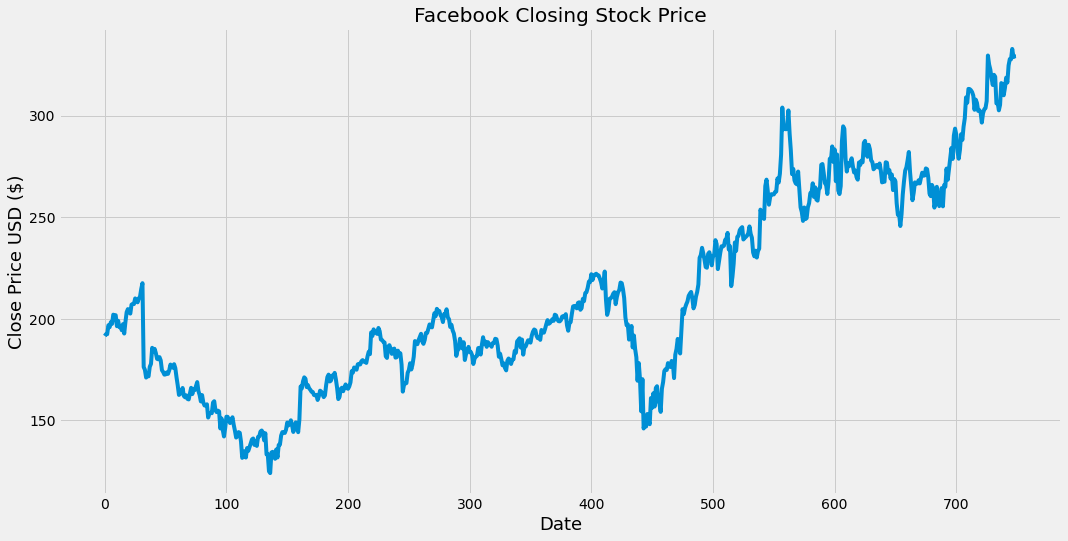

In [68]:
plt.figure(figsize=(16,8))
plt.title("Facebook Closing Stock Price")
plt.plot(FB["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.show()

In [69]:
from fbprophet import Prophet
m = Prophet(daily_seasonality=True)
m.fit(Focus)

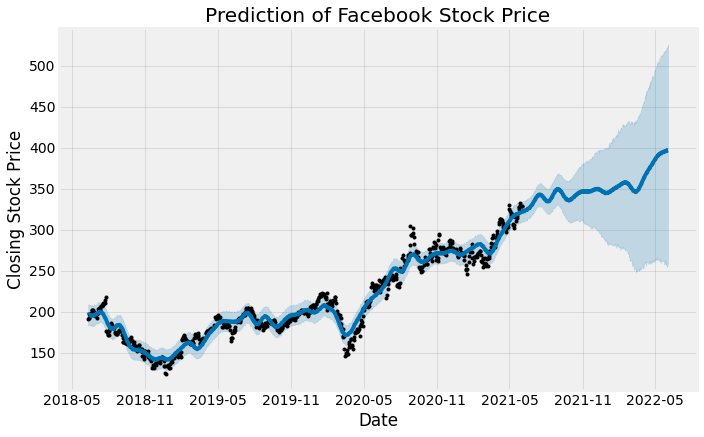

In [70]:
future = m.make_future_dataframe(periods=365)
predictions=m.predict(future)
m.plot(predictions)
plt.title("Prediction of Facebook Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.show()

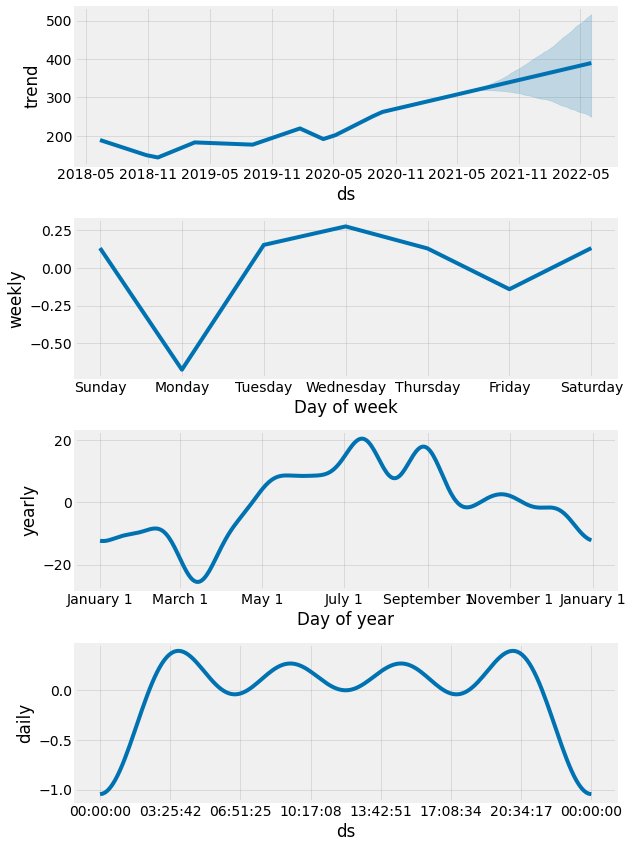

In [71]:
m.plot_components(predictions)
plt.show()